#### The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level (Hemoglobin A1c), and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

## The Attributes include:
##### - Age: Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

##### - Gender: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

##### - Body Mass Index (BMI): BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can lead to insulin resistance and impair the body's ability to regulate blood sugar levels.

##### - Hypertension: Hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. Both conditions can have detrimental effects on cardiovascular health.

##### - Heart Disease: Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.

##### - Smoking History: Smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.

##### - HbA1c Level: HbA1c (glycated hemoglobin) is a measure of the average blood glucose level over the past 2-3 months. It provides information about long-term blood sugar control. Higher HbA1c levels indicate poorer glycemic control and are associated with an increased risk of developing diabetes and its complications.

##### - Blood Glucose Level: Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes. Regular monitoring of blood glucose levels is important in the diagnosis and management of diabetes.

#### Importing Necessary Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [3]:
# importing file using file name

df = pd.read_csv("diabetes_prediction_dataset.csv")

### Inspecting the Dataframe

In [4]:
# to see the 1st 5 rows

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# to see the last 5 rows

df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
# to see the shape

df.shape

(100000, 9)

In [7]:
# to check how many duplicates are there

df.duplicated().sum()

3854

In [8]:
# to drop duplicate values

df.drop_duplicates(inplace=True)

In [9]:
df.shape

(96146, 9)

In [10]:
# get the details of all columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [11]:
# to check there is any null values

df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
# changing the data type of age to integer

df['age'] = df['age'].astype(int)

In [13]:
# checking the count of each category in smoking history 

df['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [14]:
# droping smoking history because of there is lot of No info 
df = df.drop(columns='smoking_history')

In [15]:
# checking the count of each category in gender 

df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [16]:
# to get all the statistical measures of all columns

df.describe(include = 'all')

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,56161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,41.783756,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,NaN,22.482208,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,NaN,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,NaN,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000


In [17]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,25.19,6.6,140,0
1,Female,54,0,0,27.32,6.6,80,0
2,Male,28,0,0,27.32,5.7,158,0
3,Female,36,0,0,23.45,5.0,155,0
4,Male,76,1,1,20.14,4.8,155,0


### Data Visualization

In [18]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

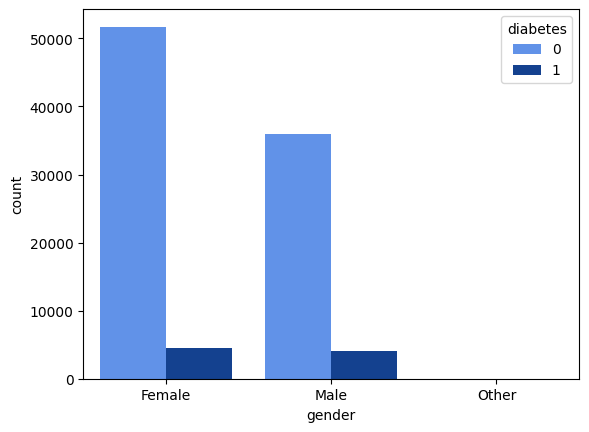

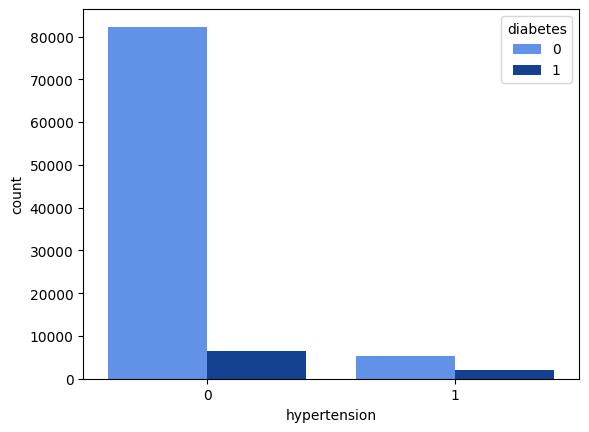

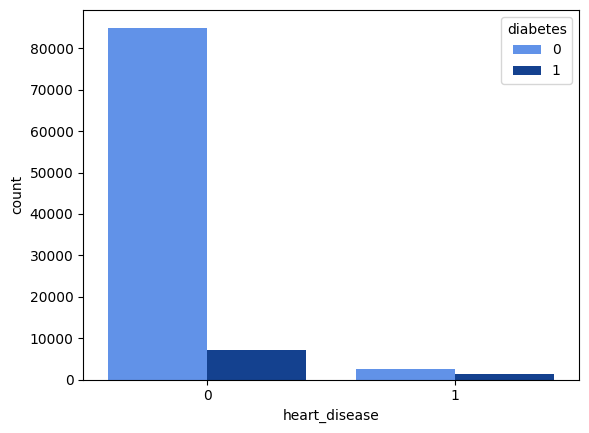

In [19]:

# Shows the Distribution of Diabetes with respect to other variables

categorical = ['gender','hypertension','heart_disease']

for i in categorical:
    shades_of_blue = ["#4a8cff", "#003ba3"]
    sns.set_palette(shades_of_blue)
    sns.countplot(x=df[i],data=df, hue = df['diabetes'])
    plt.show()

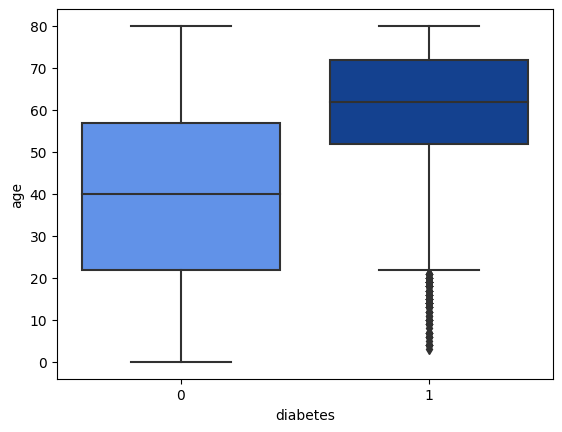

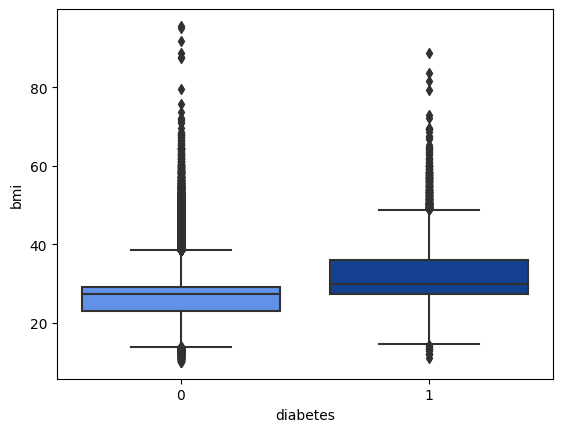

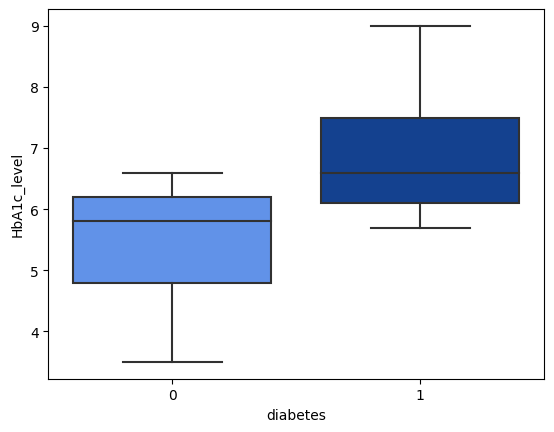

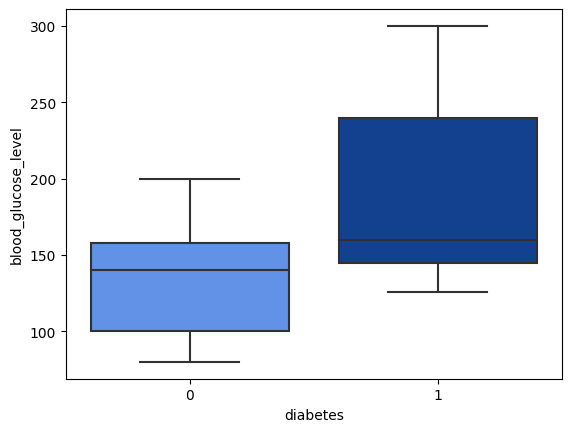

In [20]:

continuous = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for i in continuous:
    shades_of_blue = ["#4a8cff", "#003ba3"]
    sns.set_palette(shades_of_blue)
    sns.boxplot(x = df['diabetes'], y = df[i])
    plt.show()

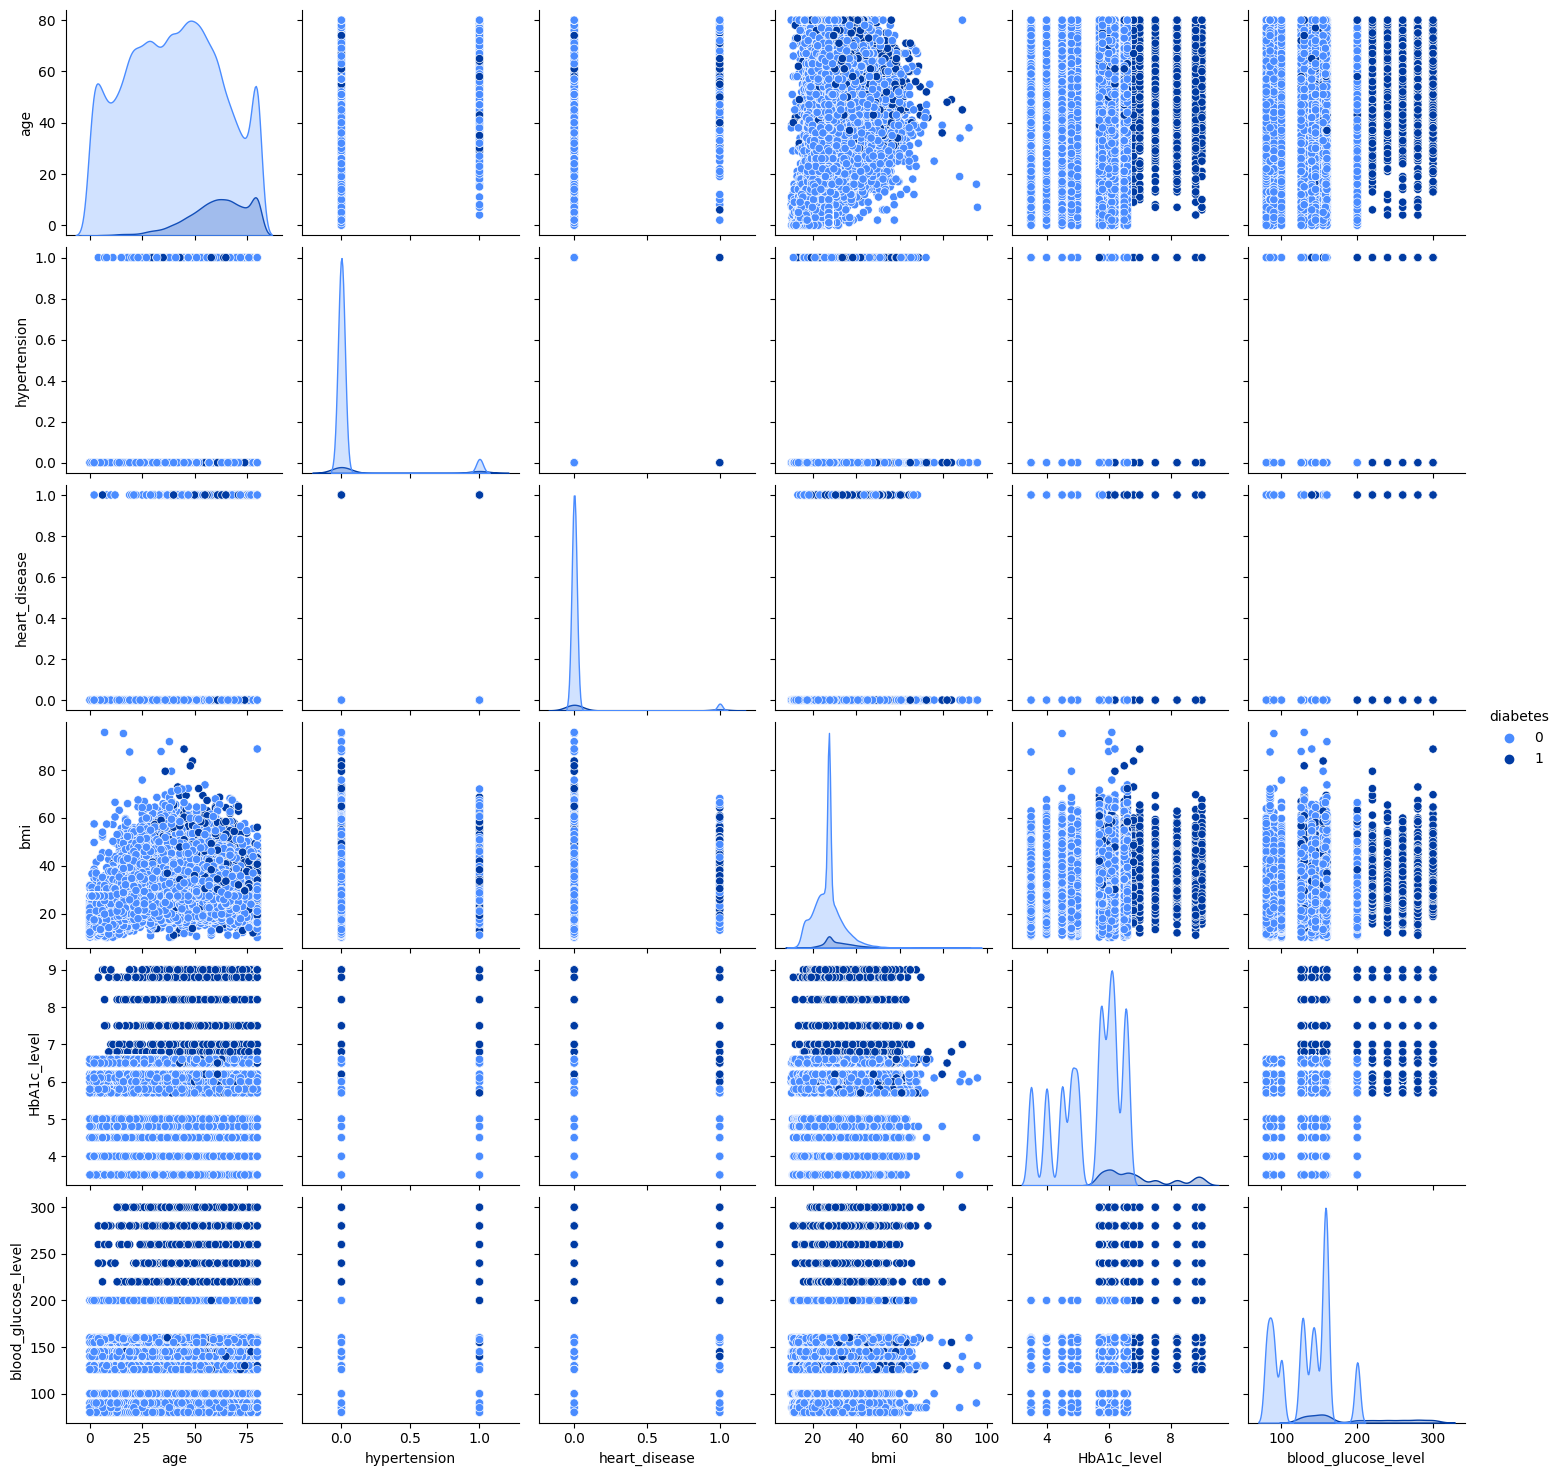

In [21]:
sns.pairplot(df,hue='diabetes')
plt.show()

In [22]:
df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [23]:
# Labeling the gender column 


lablist =  ['gender']

# Defining the map function
def label_map(x):
    return x.map({'Female': 0, "Male": 1, "Other":2})

# Applying the function to the housing list
df[lablist] = df[lablist].apply(label_map)

In [24]:
df['gender'].value_counts()

0    56161
1    39967
2       18
Name: gender, dtype: int64

### Co- relation Plot

In [25]:
df.corr()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.029035,0.014007,0.078312,-0.023461,0.019836,0.017830,0.037613
age,-0.029035,1.000000,0.257221,0.238344,0.345145,0.106691,0.114273,0.264846
hypertension,0.014007,0.257221,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710
heart_disease,0.078312,0.238344,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711
bmi,-0.023461,0.345145,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.019836,0.106691,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.017830,0.114273,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336
diabetes,0.037613,0.264846,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000


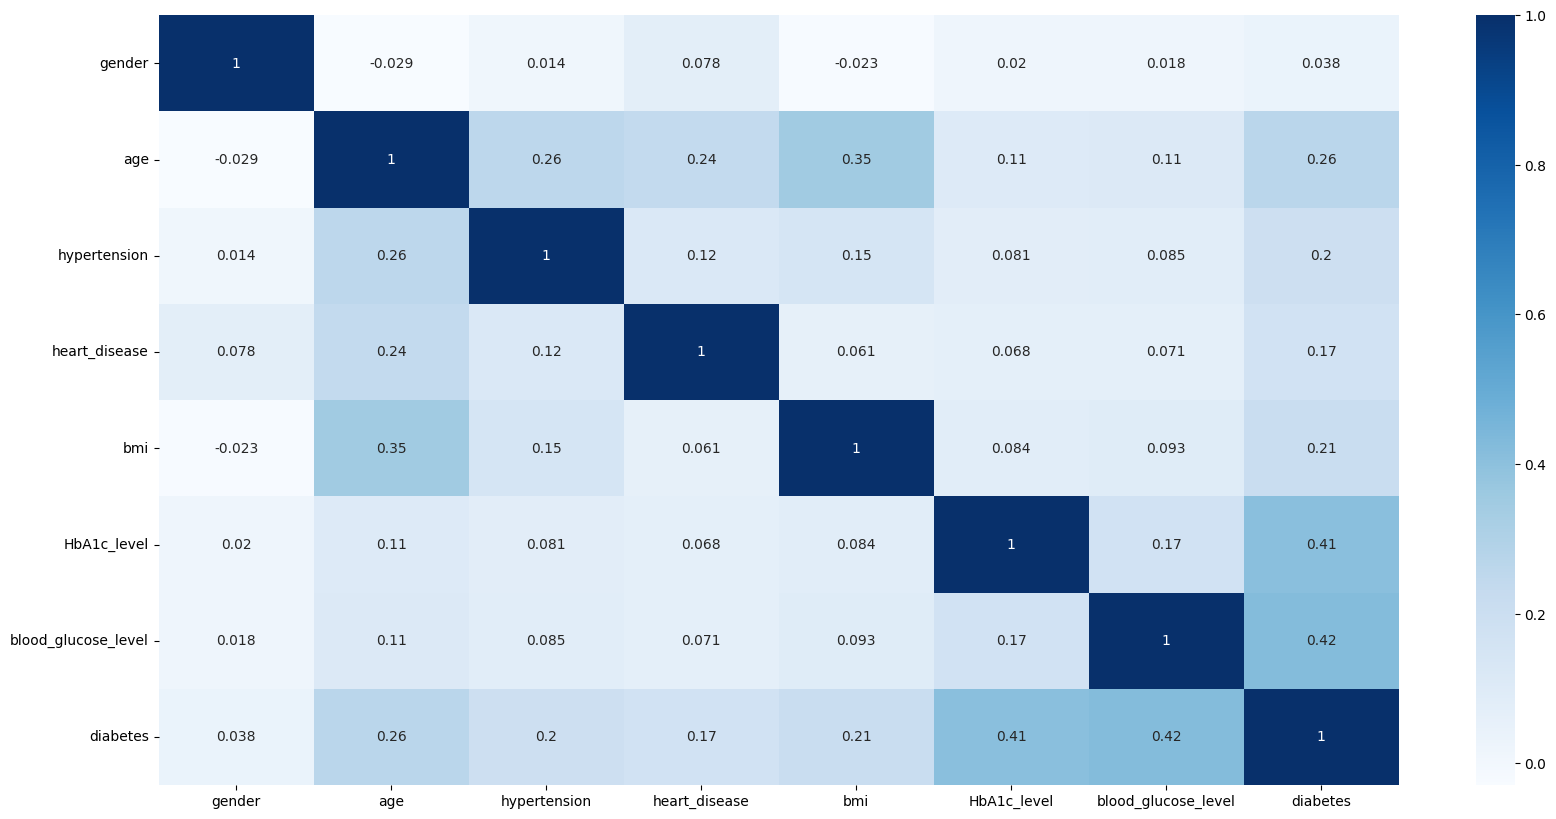

In [95]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True, cmap='Blues')
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  int32  
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   bmi                  96146 non-null  float64
 5   HbA1c_level          96146 non-null  float64
 6   blood_glucose_level  96146 non-null  int64  
 7   diabetes             96146 non-null  int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 6.2 MB


### Data Pre-processing

#### Test- Train Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Putting feature variables to X
X = df.drop(['diabetes'], axis=1)

X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80,0,1,25.19,6.6,140
1,0,54,0,0,27.32,6.6,80
2,1,28,0,0,27.32,5.7,158
3,0,36,0,0,23.45,5.0,155
4,1,76,1,1,20.14,4.8,155


In [30]:
# Putting response variable to y
y = df['diabetes']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [31]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
# To check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67302, 7), (28844, 7), (67302,), (28844,))

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

X_train[['gender','age','hypertension','hypertension','bmi','HbA1c_level','blood_glucose_level']] = scaler.fit_transform(X_train[['gender','age','hypertension','hypertension','bmi','HbA1c_level','blood_glucose_level']])

X_train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
19583,0.0,0.1500,0.0,0,0.095588,0.000000,0.090909
35629,0.5,0.4750,0.0,0,0.259921,0.490909,0.090909
74941,0.0,0.3250,0.0,0,0.202031,0.418182,0.000000
78735,0.0,0.3875,0.0,0,0.270542,0.236364,0.227273
94120,0.5,0.1125,0.0,0,0.080649,0.472727,0.000000


In [35]:
X_test.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
42784,0,24,0,0,23.39,4.8,159
43400,0,63,0,0,32.93,5.7,159
78212,0,29,0,0,27.32,5.8,85
94175,0,16,0,0,27.32,5.0,145
8334,0,70,1,0,27.32,6.6,126


In [36]:
scaler = MinMaxScaler()

X_test[['gender','age','hypertension','hypertension','bmi','HbA1c_level','blood_glucose_level']] = scaler.fit_transform(X_test[['gender','age','hypertension','hypertension','bmi','HbA1c_level','blood_glucose_level']])

X_test.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
42784,0.0,0.3000,0.0,0,0.172645,0.236364,0.359091
43400,0.0,0.7875,0.0,0,0.295742,0.400000,0.359091
78212,0.0,0.3625,0.0,0,0.223355,0.418182,0.022727
94175,0.0,0.2000,0.0,0,0.223355,0.272727,0.295455
8334,0.0,0.8750,1.0,0,0.223355,0.563636,0.209091


## Model Building

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()

In [39]:
# Training data is used for model building
lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
lr_accu = accuracy_score(y_test, y_pred_logreg)
print(lr_accu)

0.9593329635279434


In [43]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [44]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[26014,   302],
       [  871,  1657]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

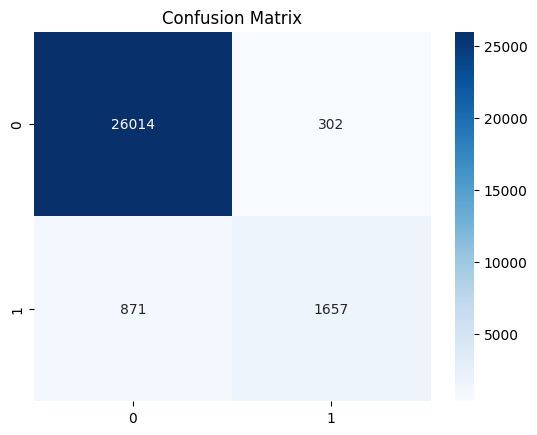

In [45]:
sns.heatmap(logistic_confusion_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26014   302]
 [  871  1657]]
Accuracy: [0.95933296]
Sensitivity : [0.96760275]
Specificity : [0.84583971]
Precision: [0.98852409]
Recall: [0.96760275]
F-score: [0.97795154]
AUC: 0.8219914762833797
ROC curve:


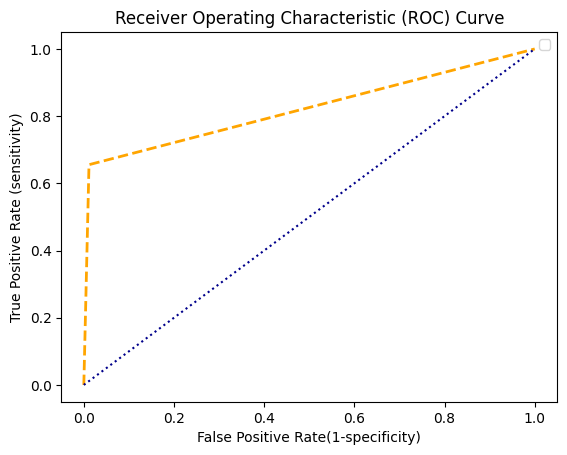

In [48]:
get_summary(y_test, y_pred_logreg)

### Support Vector Machine (SVM)

In [49]:
X_train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
19583,0.0,0.1500,0.0,0,0.095588,0.000000,0.090909
35629,0.5,0.4750,0.0,0,0.259921,0.490909,0.090909
74941,0.0,0.3250,0.0,0,0.202031,0.418182,0.000000
78735,0.0,0.3875,0.0,0,0.270542,0.236364,0.227273
94120,0.5,0.1125,0.0,0,0.080649,0.472727,0.000000


In [50]:
y_train.head()

19583    0
35629    0
74941    0
78735    0
94120    0
Name: diabetes, dtype: int64

In [51]:
from sklearn.svm import SVC

In [52]:
svc = SVC()

In [53]:
svc.fit(X_train,y_train)

SVC()

In [54]:
y_pred_svc = svc.predict(X_test)

In [55]:
svc_accu = accuracy_score(y_test,y_pred_svc)
print(svc_accu)

0.9633545971432533


In [56]:
SVM_confusion_matrix = confusion_matrix(y_test,y_pred_svc)
SVM_confusion_matrix

array([[26261,    55],
       [ 1002,  1526]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

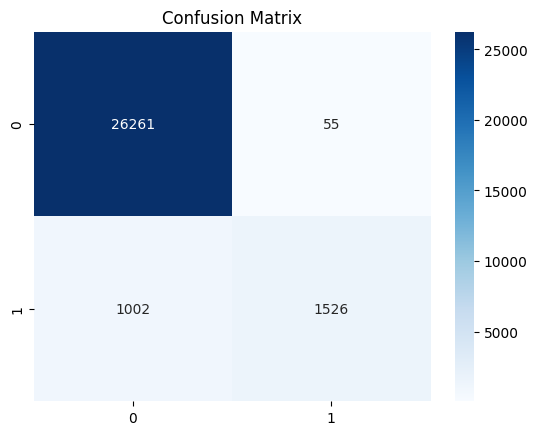

In [57]:
sns.heatmap(SVM_confusion_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26261    55]
 [ 1002  1526]]
Accuracy: [0.9633546]
Sensitivity : [0.96324689]
Specificity : [0.96521189]
Precision: [0.99791002]
Recall: [0.96324689]
F-score: [0.98027212]
AUC: 0.8007746286130977
ROC curve:


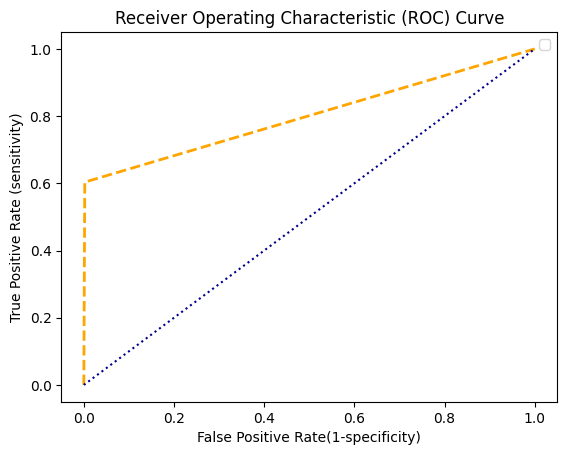

In [58]:
get_summary(y_test,y_pred_svc)

### Naive Bayes Classification

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
gnb = GaussianNB()

In [61]:
gnb.fit(X_train,y_train)

GaussianNB()

In [62]:
y_pred_gnb = gnb.predict(X_test)

In [63]:
gnb_accu = accuracy_score(y_test,y_pred_gnb)
print(gnb_accu)

0.9019900152544723


In [64]:
gnb_confusion_matrix = confusion_matrix(y_test,y_pred_gnb)
gnb_confusion_matrix

array([[24301,  2015],
       [  812,  1716]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

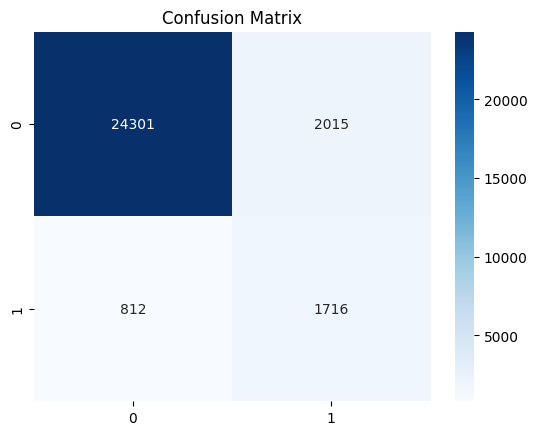

In [65]:
sns.heatmap(gnb_confusion_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[24301  2015]
 [  812  1716]]
Accuracy: [0.90199002]
Sensitivity : [0.96766615]
Specificity : [0.45993031]
Precision: [0.92343061]
Recall: [0.96766615]
F-score: [0.94503101]
AUC: 0.8011140404547649
ROC curve:


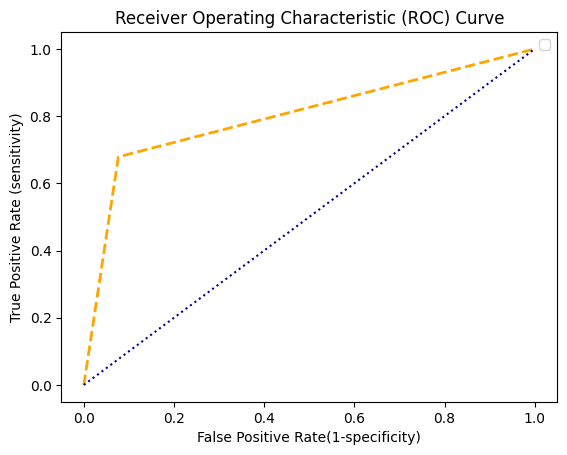

In [66]:
get_summary(y_test,y_pred_gnb)

### K-Nearest Neighbour

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred_knn = knn.predict(X_test)

In [71]:
knn_accu = accuracy_score(y_test,y_pred_knn)
knn_accu

0.9637012896962973

In [72]:
knn_confusion_matrix = confusion_matrix(y_test,y_pred_knn)
knn_confusion_matrix

array([[26088,   228],
       [  819,  1709]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

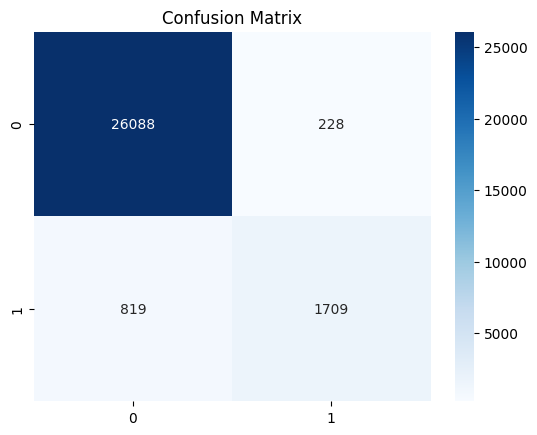

In [73]:
sns.heatmap(knn_confusion_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26088   228]
 [  819  1709]]
Accuracy: [0.96370129]
Sensitivity : [0.96956182]
Specificity : [0.8822922]
Precision: [0.99133607]
Recall: [0.96956182]
F-score: [0.98032805]
AUC: 0.8336822751620518
ROC curve:


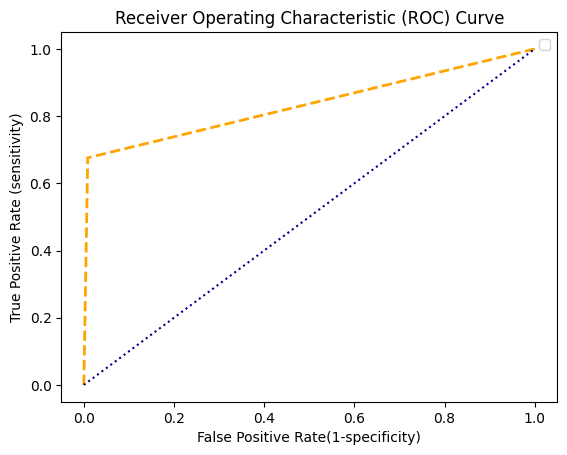

In [74]:
get_summary(y_test,y_pred_knn)

### Deciosion Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dtree = DecisionTreeClassifier()

In [77]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred_dtree = dtree.predict(X_test)

In [79]:
dtree_accu = accuracy_score(y_test,y_pred_dtree)
dtree_accu

0.9448065455554014

In [80]:
dtree_confusion_matrix = confusion_matrix(y_test,y_pred_dtree)
dtree_confusion_matrix

array([[25339,   977],
       [  615,  1913]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

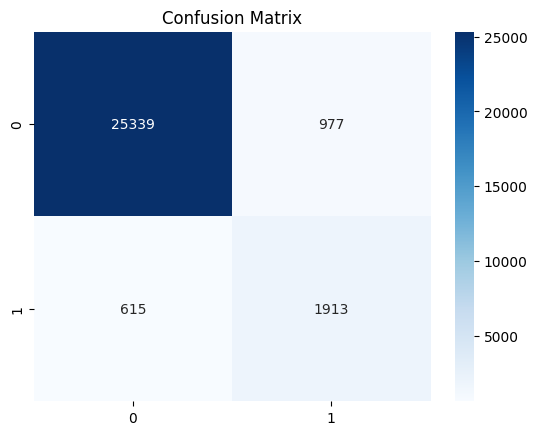

In [81]:
sns.heatmap(dtree_confusion_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[25339   977]
 [  615  1913]]
Accuracy: [0.94480655]
Sensitivity : [0.97630423]
Specificity : [0.66193772]
Precision: [0.9628743]
Recall: [0.97630423]
F-score: [0.96954276]
AUC: 0.8597994902749638
ROC curve:


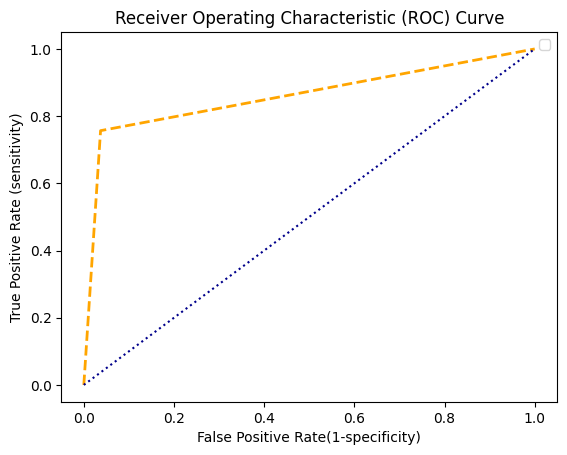

In [82]:
get_summary(y_test,y_pred_dtree)

### Random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier()

In [85]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
y_pred_rfc = rfc.predict(X_test)

In [87]:
rfc_accu = accuracy_score(y_test,y_pred_rfc)
rfc_accu

0.9690403550131743

In [88]:
random_forest_confusion_matrix = confusion_matrix(y_test,y_pred_rfc)
random_forest_confusion_matrix

array([[26166,   150],
       [  743,  1785]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

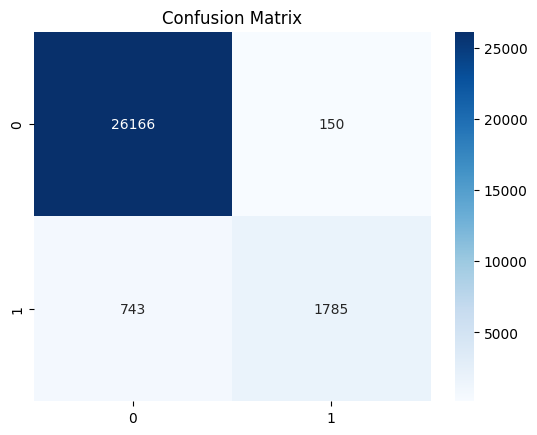

In [89]:
sns.heatmap(random_forest_confusion_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[26166   150]
 [  743  1785]]
Accuracy: [0.96904036]
Sensitivity : [0.97238842]
Specificity : [0.92248062]
Precision: [0.99430005]
Recall: [0.97238842]
F-score: [0.98322217]
AUC: 0.850195908875767
ROC curve:


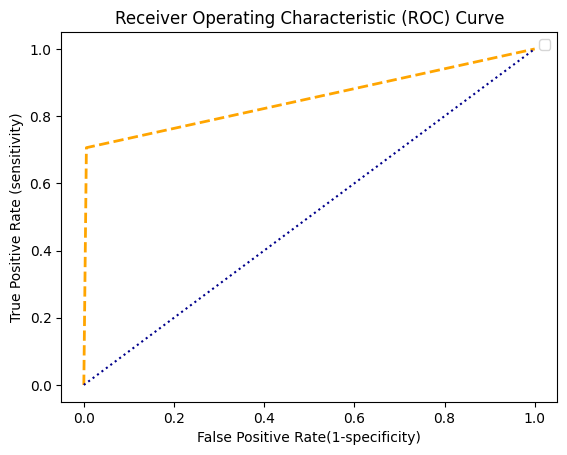

In [90]:
get_summary(y_test, y_pred_rfc)

In [91]:
# Find which algorithm have better accuracy

In [92]:
algorithm = ['Logistic Regression', 'SVM', 'Naive Bayes','KNN','Decesion Tree','            Random Forest']
accuracies = [lr_accu,svc_accu,gnb_accu,knn_accu,dtree_accu,rfc_accu]
accuracies_simplified = [round(i*100,2)for i in accuracies]
compare = {'algorithm':algorithm,'accuracies':accuracies_simplified}
compare

{'algorithm': ['Logistic Regression',
  'SVM',
  'Naive Bayes',
  'KNN',
  'Decesion Tree',
  '            Random Forest'],
 'accuracies': [95.93, 96.34, 90.2, 96.37, 94.48, 96.9]}

In [93]:
comp = pd.DataFrame(compare)
comp

,algorithm,accuracies
0,Logistic Regression,95.93
1,SVM,96.34
2,Naive Bayes,90.20
3,KNN,96.37
4,Decesion Tree,94.48
5,Random Forest,96.90


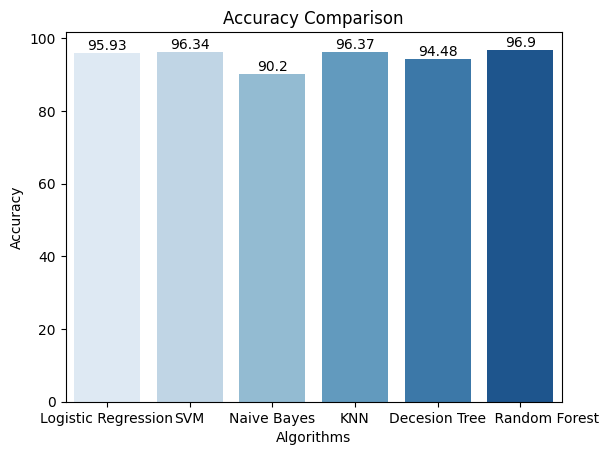

In [94]:
sns.barplot(data = comp,x='algorithm',y='accuracies',palette="Blues")
plt.title('Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
for index,row in comp.iterrows():
    plt.annotate(row['accuracies'],(index,row['accuracies']),ha= 'center',va='bottom')
plt.show()

## Thank You